In [231]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from astroplan import Observer

ModuleNotFoundError: No module named 'astroplan'

In [217]:
#Create functions.

def make_lightcurve(t, mod):
    mag = np.zeros(len(t))
    for ind,i in enumerate(t):
        a = np.interp(i, model[mod][:,0], model[mod][:,1])
        mag[ind] = a
    return(mag)

def make_scale_model(mag, rand_dist_range):
    mag_scale=[]
    for i in range(len(rand_dist_range)):
        obs = mag + 5*np.log10((rand_dist_range[i])/(dist_all_models))
        mag_scale.append(obs)
    return(mag_scale)

def introduce_telescope_err(mag_scale):
    corrected_mags = []
    rand_err = np.random.uniform(-0.25, 0.25, len(mag_scale[0]))
    for mags in mag_scale:
        corrected_mags.append(mags + rand_err)
        
    newarr=[]    
    for j in range(len(corrected_mags)):
        corrected_mags[j][corrected_mags[j] > cutoff_mag] = -1
        num = np.where(corrected_mags[j]==-1)
    if len(num[0]) > 10:
         print('Unobservable')
    #print(num)
    #print(len(num[0]))
    
    
    #for elem in corrected_mags:
        #for j in range(len(elem)):
            #newval = elem[j]
            #if newval > cutoff_mag:
                #newval = -1
                
                
#FIGURE OUT HOW TO SAVE THIS DATA IN AN ARRAY FOR EACH MODEL (like corrected mags but with the new values instead)
#It's putting all elem[0] in one array and then the next has elem[1] and so on...
#Need to instead replace values in corrected mags by -1 instead of creating a new array.

    #print(corrected_mags)
    return(corrected_mags)

def make_chi_squared(mag_err, mag):
    all_chi2 = []
    for mags in mag_err:
        chi2 = np.sum(np.square(mags - mag)/mag)
        all_chi2.append(chi2)
    return(all_chi2)

def return_model(dictionary):
    min_chi = min(dictionary.items(), key=lambda x : x[1])
    lowest_chi = min(min_chi[1])
    related_model = int(min_chi[0])
    #print('Lowest value in dict:', min(min_chi[1]))
    #print('Model with lowest value in dict:', min_chi[0])
    return(min_chi, lowest_chi, related_model)

In [218]:
#Load in models.

lc = np.load('light_curves.npz')
m0 = lc['two']
m1 = lc['two_r']
m2 = lc['two_b']
m3 = lc['three']
m4 = lc['three_b']
m5 = lc['KW']
m6 = lc['BR']
m7 = lc['GW']

#Define parameters.

N = 100

model = [m0, m1 ,m2 ,m3 ,m4 ,m5 ,m6 ,m7]
time = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5]

dist = np.random.uniform(40,200,N) #Mpc
dist_all_models = 40 #Mpc
low_dist_err = 0.7
high_dist_err = 1.3

cutoff_mag = 21

In [219]:
#Simulating N kilonova models in the universe.

array_kns = []
all_kn_distance = []
model_distance = []
min_chi2 = []
best_model = []
ind_chi2 = []
dist_ind_value = []

for j in range(N):
    
    #Create kn in universe.
    x = np.random.randint(0, 7)
    gen_kn = make_lightcurve(time, x)
    kn = make_scale_model(gen_kn, [dist[j]])
    
    #Record model of kn chosen.
    array_kns.append(x)
    
    #Need to find which model matches the kn in universe.
    
    #Work out step of model over distance.
    dist_range = np.arange(np.floor(low_dist_err*dist[j]), np.ceil(high_dist_err*dist[j]), 1)
    
    #Loop over all models.
    chisquare_models = []
    for i in range(len(model)):
        magnitude = make_lightcurve(time, i)
        scale = make_scale_model(magnitude, dist_range)
        error = introduce_telescope_err(scale)
        chisquare = make_chi_squared(error, kn)
        chisquare_models.append(chisquare)

    #Save chisquared data in dictionary.
    chi_dict = {'0':chisquare_models[0], '1':chisquare_models[1], '2':chisquare_models[2], '3':chisquare_models[3], '4':chisquare_models[4], '5':chisquare_models[5], '6':chisquare_models[6], '7':chisquare_models[7]}
    return_model(chi_dict)
    
    #Using return model function to find the min chi and best model fit for all the models over every iteration.
    lowest_chi = return_model(chi_dict)[1]
    related_model = return_model(chi_dict)[2]
    min_chi2.append(lowest_chi)
    best_model.append(related_model)
    
    #Finding the index of the minimum chi value to find out where the distance of the model is.
    chi_index_min = np.argmin(chisquare_models[int(related_model)])
    ind_chi2.append(chi_index_min)
    dist_range_index = dist_range[int(chi_index_min)]
    dist_ind_value.append(dist_range_index)
    
    #Looping over dist_all_models N times for kn_info dict.
    all_kn_distance.append(int(dist[j]))

Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable

Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable
Unobservable

In [220]:
#Save KN, best fit model, min chi2 value, model distance (use indexing to find lowest) and KN distance)

kn_info = {'KN model':array_kns, 'Best fit model':best_model, 'Minimum Chi2':min_chi2, 'Model distance':dist_ind_value, 'KN distance':all_kn_distance}
print(kn_info)

{'KN model': [2, 1, 0, 0, 4, 3, 2, 0, 6, 1, 6, 2, 0, 3, 3, 4, 0, 5, 6, 6, 5, 1, 6, 3, 2, 0, 4, 2, 1, 5, 3, 2, 6, 3, 6, 6, 1, 2, 0, 2, 5, 0, 2, 4, 0, 4, 6, 1, 1, 5, 0, 1, 0, 3, 1, 6, 3, 2, 6, 1, 0, 4, 4, 1, 4, 6, 2, 2, 2, 2, 6, 5, 4, 1, 6, 1, 2, 2, 3, 1, 0, 1, 6, 6, 6, 5, 2, 4, 3, 4, 1, 4, 4, 0, 5, 3, 0, 2, 2, 6], 'Best fit model': [0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 4, 7, 3, 3, 7, 7, 7, 3, 7, 0, 3, 0, 3, 3, 3, 0, 3, 3, 7, 3, 3, 3, 3, 3, 3, 0, 7, 0, 0, 7, 3, 7, 3, 0, 3, 0, 3, 7, 0, 7, 3, 0, 7, 7, 4, 0, 0, 4, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 7, 0, 7, 3, 0, 3, 7, 7, 3, 3, 0, 0, 7, 3, 7, 0, 7, 3, 4, 3], 'Minimum Chi2': [177.66591537459985, 325.643454344637, 151.15992590802767, 259.2982835875407, 181.71499692262375, 236.66868651275638, 266.6086755585862, 260.9434365135321, 195.12504839629526, 295.6186010758237, 139.85896764084617, 266.6173887848546, 287.5409489695387, 126.65008273877686, 234.59724788474088, 269.7294627184977, 322.5108227806077, 245.69076557969524

[90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0, 90.0]


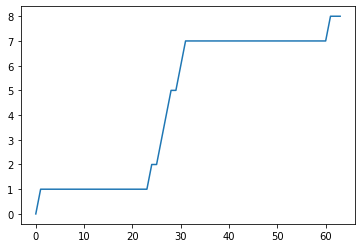

In [233]:
#Creating the efficiency curve.

best_val = []
cumulative = []
match_dist = []
match = 1
non_match = 0

array_kns = np.asarray(array_kns)
best_model = np.asarray(best_model)

for i in range(len(model)):
    for j in range(len(model)):
        kn_ind = np.where(array_kns==i)
        best_ind = best_model[kn_ind]
        best_val.append(best_ind)
        if best_val[i][j] == i:
            match_dist.append(dist_ind_value[best_val[i][0]])
            cumulative.append(match)
        else:
            cumulative.append(non_match)
             
cumsum = np.cumsum(cumulative)

print(match_dist)

plt.plot(cumsum)

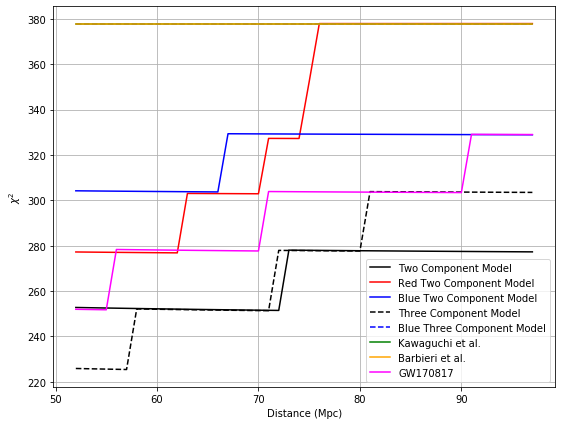

In [222]:
plt.figure(figsize=(9,7))
plt.plot(dist_range, chi_dict['0'], color='black', label='Two Component Model')
plt.plot(dist_range, chi_dict['1'], color='red', label='Red Two Component Model')
plt.plot(dist_range, chi_dict['2'], color='blue', label='Blue Two Component Model')
plt.plot(dist_range, chi_dict['3'], color='black', linestyle='dashed', label='Three Component Model')
plt.plot(dist_range, chi_dict['4'], color='blue', linestyle='dashed', label='Blue Three Component Model')
plt.plot(dist_range, chi_dict['5'], color='green', label='Kawaguchi et al.')
plt.plot(dist_range, chi_dict['6'], color='orange', label='Barbieri et al.')
plt.plot(dist_range, chi_dict['7'], color='fuchsia', label='GW170817')
plt.xlabel('Distance (Mpc)')
plt.ylabel('$\chi^{2}$')
#plt.ylim(0,1)
#plt.xlim(28,51)
plt.grid()
plt.legend()
plt.savefig('chi_ehanced.png')

In [223]:
#Simulating where GOTO is in the world

ra = np.random.normal(np.pi, np.pi/4, 1000000)
dec = np.random.normal(0, np.pi/8, 1000000)

#goto_loc = 

SyntaxError: invalid syntax (<ipython-input-223-af3185ffda35>, line 6)